Data source: https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection

In [151]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [160]:
df = pd.read_csv('../data/raw/onlinefraud.csv')
display(df.head(), df.dtypes, df.isnull().any(), df.duplicated())

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/onlinefraud.csv'

In [ ]:
display(df.duplicated().any())

In [156]:
numerical_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X = df[numerical_columns]
display(X)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,9839.64,170136.00,160296.36,0.00,0.00
1,1864.28,21249.00,19384.72,0.00,0.00
2,181.00,181.00,0.00,0.00,0.00
3,181.00,181.00,0.00,21182.00,0.00
4,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13
6362616,6311409.28,6311409.28,0.00,0.00,0.00
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,850002.52,850002.52,0.00,0.00,0.00


In [27]:
y = df['isFraud'].astype(int)
display(y)

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
knn = KNeighborsClassifier()

In [30]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


--> model is highly accurate due to high dataset imbalance.

### Evaluate the Model on the Correct Target:
Predict the target and evaluate using metrics other than accuracy (due to class imbalance, accuracy alone can be misleading). Use precision, recall, and F1-score to get a better understanding of performance:

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))
display(confusion_matrix(y_test, y_pred))

Model Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.87      0.69      0.77      1641

    accuracy                           1.00   1272524
   macro avg       0.94      0.84      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524



array([[1270718,     165],
       [    513,    1128]])

- --> Precision: Out of all the instances predicted as positive (fraud), 87% were actually positive.
- --> Recall (Sensitivity): Out of all actual positive (fraud) cases, 67% were correctly identified.
- --> F1-score: 77%

model is missing 31% of actual fraud cases.

- Out of 1,270,883 non-fraud cases (class 0), only 165 are incorrectly labeled as fraud.
- For the 1,641 fraud cases (class 1), 1,128 are correctly identified, but 513 are missed.

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [92]:
# create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1270718,     165],
       [    513,    1128]])

In [94]:
# Create ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp

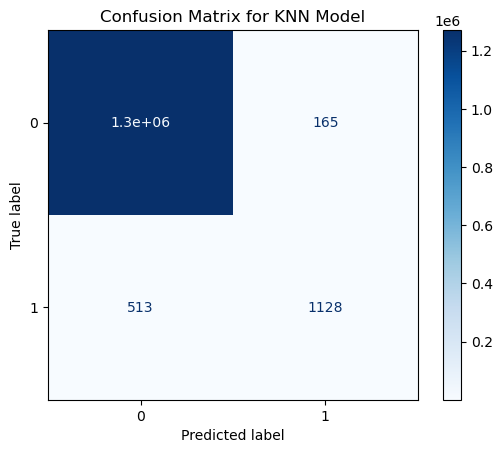

In [96]:
# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)  # Optional: Change the color scheme if needed
plt.title("Confusion Matrix for KNN Model")
plt.show()

In [98]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

In [100]:
# Get the prediction probabilities
y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (fraud)
y_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [101]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
precision
recall

array([1.        , 0.8305911 , 0.75137112, 0.68738574, 0.62766606,
       0.57038391, 0.        ])

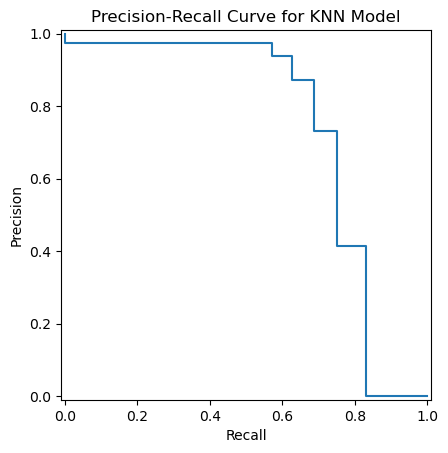

In [102]:
# Display precision-recall curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve for KNN Model")
plt.show()

- At the left of the curve, you have high precision, meaning the model predicts fraud accurately but at the cost of recall (it may be missing many fraud cases).
- As recall increases (moving right), precision decreases because the model starts making more false positive predictions to capture more fraud cases.
- Steep Drop: There’s a noticeable drop in precision after recall reaches around 0.7. This suggests that once the model tries to capture more fraud cases (increasing recall), it starts to make many incorrect predictions (false positives), which lowers precision.
- High Recall, Low Precision Region: between 0.8 and 1.0. this is where the model would make the most errors.

In [106]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

In [109]:
# Get the prediction probabilities
y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (fraud)
y_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [110]:
# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

In [111]:
# Add a 0 to the end of thresholds to match precision and recall arrays
thresholds = np.append(thresholds, 1)

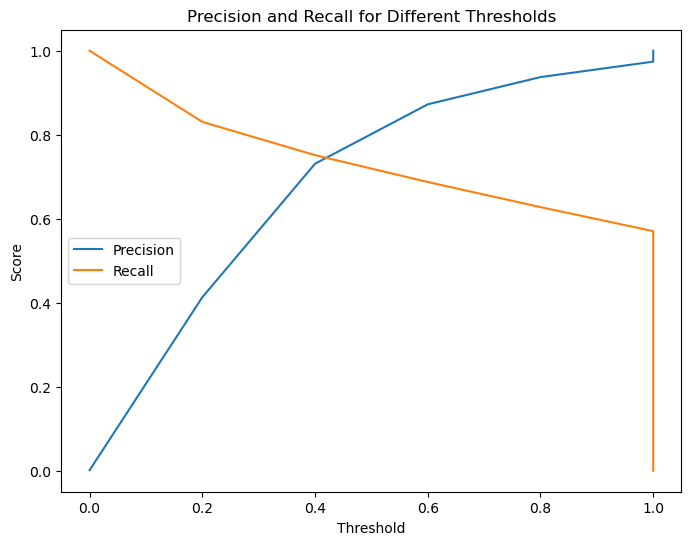

In [112]:
# Plot Precision and Recall against Thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision, label="Precision")
plt.plot(thresholds, recall, label="Recall")
plt.title("Precision and Recall for Different Thresholds")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

- The blue line (Precision) increases steadily as the threshold increases, reaching its highest value near a threshold of 1. This means as you increase the threshold, the model becomes more conservative and makes fewer positive predictions (fraud cases), but when it does, it’s very confident.
- The orange line (Recall) decreases as the threshold increases, meaning as you raise the threshold, fewer true fraud cases are captured.
- The intersection point of these two lines is where you have a balance between precision and recall. From the graph, this balance occurs around a threshold of 0.4–0.5.

---

In [113]:
# Set a new threshold for classification
threshold = 0.4

# Apply the threshold to get new predictions
y_pred_threshold = (y_prob >= threshold).astype(int)
y_pred_threshold

print(classification_report(y_test, y_pred_threshold))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.73      0.75      0.74      1641

    accuracy                           1.00   1272524
   macro avg       0.87      0.88      0.87   1272524
weighted avg       1.00      1.00      1.00   1272524



In [114]:
# Set a new threshold for classification
threshold = 0.5

# Apply the threshold to get new predictions
y_pred_threshold = (y_prob >= threshold).astype(int)
y_pred_threshold

print(classification_report(y_test, y_pred_threshold))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.87      0.69      0.77      1641

    accuracy                           1.00   1272524
   macro avg       0.94      0.84      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524



- a threshold of 0.5 seems better for a good balance between precision and recall for the fraud detection model.

---